<a href="https://colab.research.google.com/github/jmgrocho/ECE577/blob/master/Grocholski_Joseph_ECE577_Homework9_py2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install --upgrade pyswarm

Requirement already up-to-date: pyswarm in /usr/local/lib/python2.7/dist-packages (0.6)


In [0]:
pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python2.7/dist-packages (2.2.4)


In [0]:
# Import libraries
import google.colab
import sklearn
from sklearn import cluster
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pyswarm import pso
import numpy as np
from scipy import spatial
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math
import random
from google.colab import drive

In [0]:
# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Selected bands:  
Band 3
Band 5
Band 8
Band 20
Band 55
Band 62


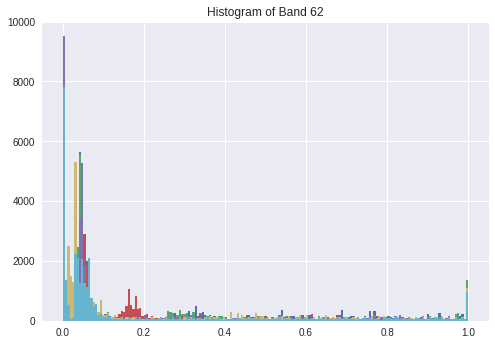

In [68]:
# 1.  Read in Landsat data, perform downsampling, select 6 bands at random
L = 370856
delta = 10
DS = int(round((L/delta),0))+1
data = np.ones((DS,6))
target_names = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7']
print('Selected bands:  ')
rband = [3,5,8,20,55,62]
for k in range(0,6):
  print('Band '+str(rband[k]))
  with open('/content/gdrive/My Drive/ECE577/hw09/'+'dc'+str(rband[k])+'.txt') as f:
    for line in range(0,L,delta):
      data[int(line/delta),k] = f.readline()
    plt.hist(data[:,k], bins=175,normed=False)
    plt.title("Histogram of Band "+str(rband[k]))

In [0]:
#2.  Cluster into 7 clusters using K-means
kmeans = sklearn.cluster.KMeans(init='k-means++',n_clusters=7,n_init=10)
kmeans.fit(data)
targets = kmeans.predict(data)
centroids = kmeans.cluster_centers_

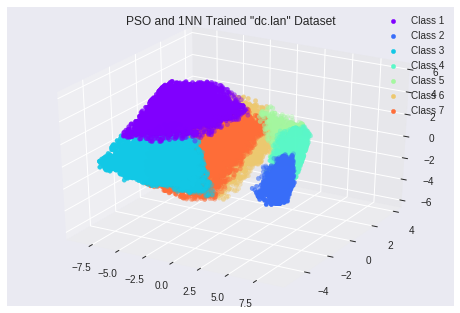

In [53]:
#3.  Linear Discriminant Analyis for dimension reduction to 3D
lda = LinearDiscriminantAnalysis(n_components=3)
reduced_data = lda.fit(data,targets).transform(data)
colors = cm.rainbow(np.linspace(0,1,8))
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for color, i, target_name in zip(colors, [0,1,2,3,4,5,6], target_names):
  ax.scatter(reduced_data[targets == i, 0],reduced_data[targets == i, 1],reduced_data[targets == i, 2],color = color, label = target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PSO and 1NN Trained "dc.lan" Dataset')
plt.show()

In [60]:
#4.  Split data 30% and 70% testing and training respectively, PSO
print(train_count)
train_count = int(round(3709*.7)) 
train_data = data[0:train_count,:] 
test_data = data[train_count:3709,:] 
train_kmeans = sklearn.cluster.KMeans(init='k-means++', n_clusters=7, n_init=10) 
train_kmeans.fit(train_data) 
tc = train_kmeans.cluster_centers_ 
def distanceToCentroid(x):
  x1,x2,x3,x4,x5,x6 = x
  c1,c2,c3,c4,c5,c6 = tc[i,0],tc[i,1],tc[i,2],tc[i,3],tc[i,4],tc[i,5]
  return math.sqrt((c1-x1)**2 + (c2-x2)**2 +(c3-x3)**2 +(c4-x4)**2 +(c5-x5)**2 +(c6-x6)**2)
# minimizing distance to class 1 in 6 dimensions
lb = [0,0,0,0,0,0]
ub = [1,1,1,1,1,1]
pso_centroids = []
for i in range(0,7):
  xopt, fopt = pso(distanceToCentroid, lb, ub) #last parameter: , ieqcons = cons
  pso_centroids.append(xopt) 
class_estimate = [] 
for j in range(0,train_count): 
  dist = []     
  point = data[j,:]     
  for k in range(0,7):
    dist.append(spatial.distance.euclidean(pso_centroids[k],point)) 
  class_estimate.append(dist.index(min(dist))) 
confusion = sklearn.metrics.confusion_matrix(targets[0:train_count],class_estimate) 
print(confusion) 
diff = targets[0:train_count] - class_estimate 
wrong = -round(math.sqrt(2*L)) 
for i in range(len(diff)):     
  if diff[i] != 0:         
    wrong += 1 
accuracy = float(len(diff)-wrong)/len(diff) 
print('training accuracy: '+str(accuracy*100)) 


2596
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
[[  0 153   0   0  36  75   0]
 [  1   0 114   0   0   0 270]
 [  0   2   0  87 218   0   0]
 [ 11   0 325   0   0   0  90]
 [484   1   0   0   0   1  17]
 [  4   4   0  56   0 338   0]
 [  0 124   0 183   0   2   0]]
training accuracy: 46.186440678
